In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# load data 

X_train_standart = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_standart.csv")
X_train_normal = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_normal.csv")
X_train_minmax = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax.csv")
X_train_pca = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_pca.csv")
X_train_yeo = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_yeo.csv")
X_train_log = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_log.csv")
train_nomr_yeo = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_norm_yeo.csv")
train_norm_log = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_norm_log.csv")
train_stand_log = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_stand_log.csv")
train_stand_yeo = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_stand_yeo.csv")
train_minmax_log = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax_log.csv")
train_minmax_yeo = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/data feature/feature_minmax_yeo.csv")
data_interpret = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/Data_project.csv")

# Find Best Centroid

In [4]:
# function for find best centroid

def best_cluster (data):
    """
    Find best cluster use methods elbow
    and silhouette (choose value from silhouette)
    """
    model = KMeans(random_state=123) 
    visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

    visualizer.fit(data)    
    visualizer.poof() 

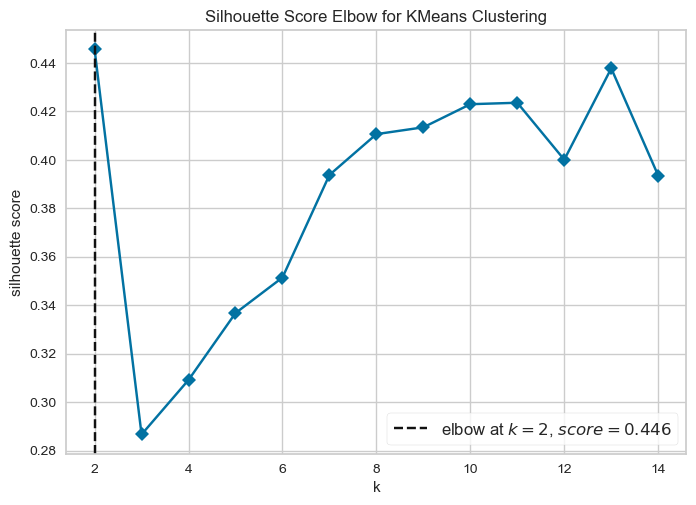

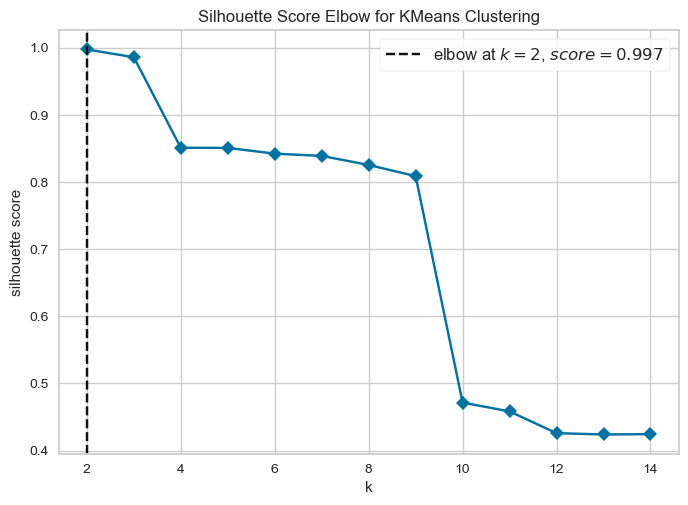

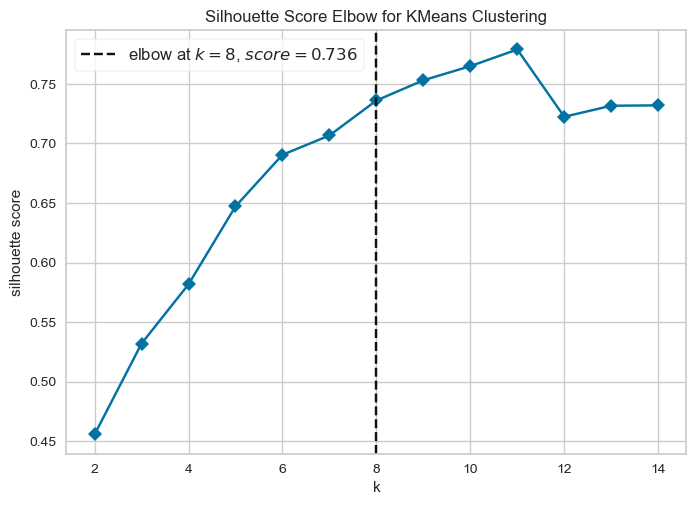

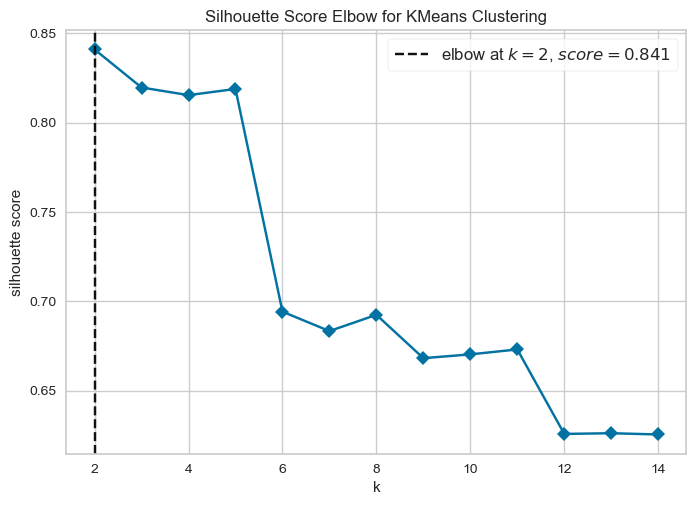

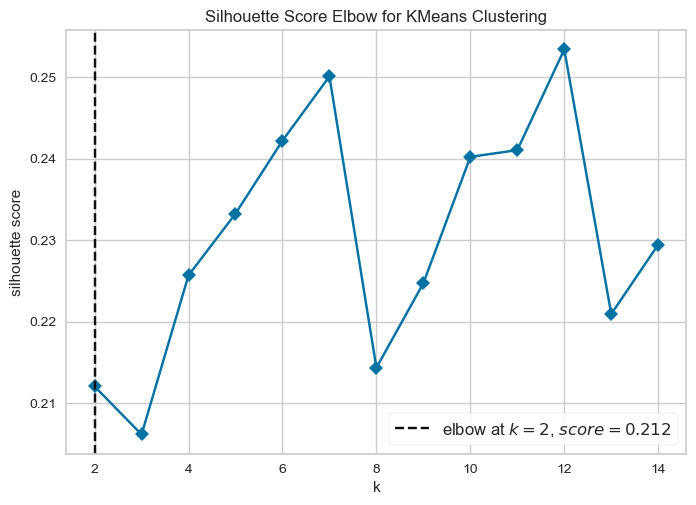

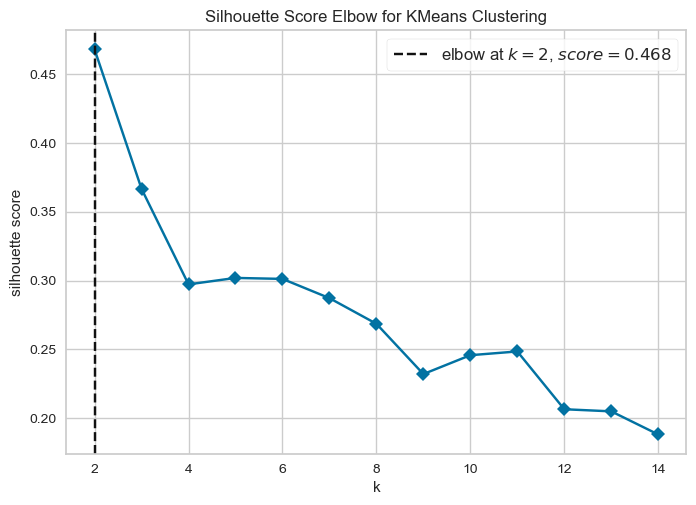

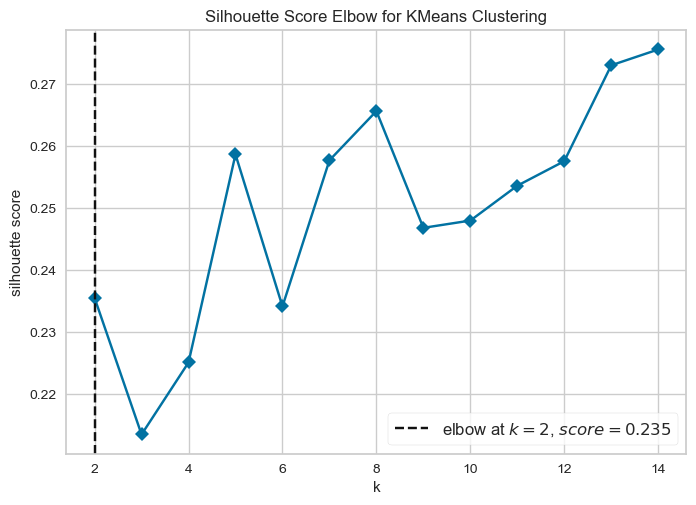

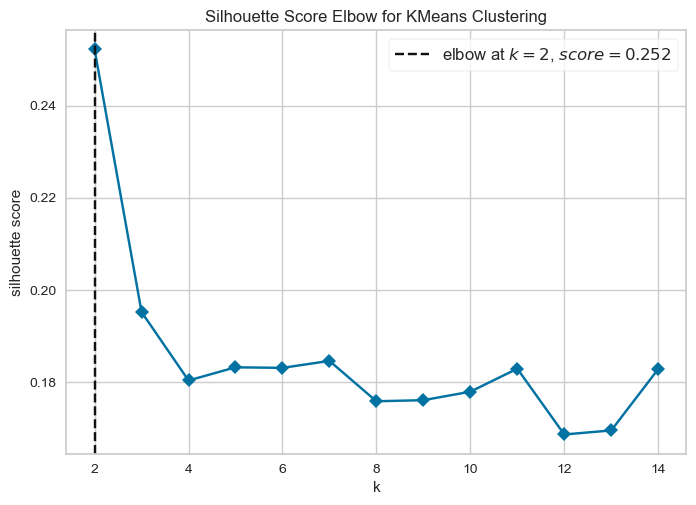

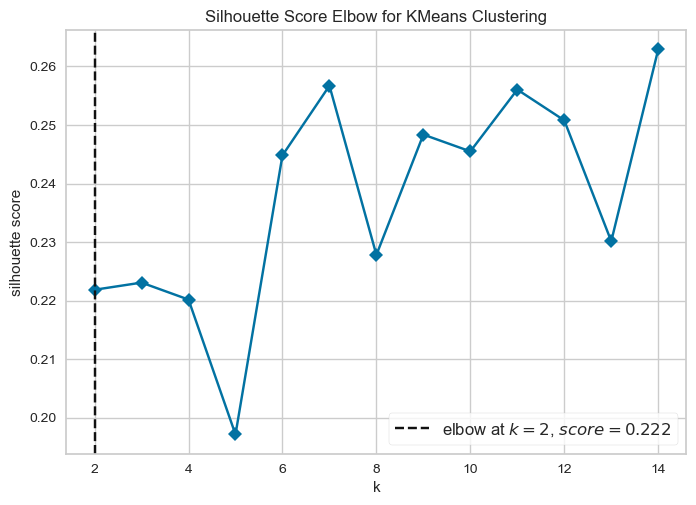

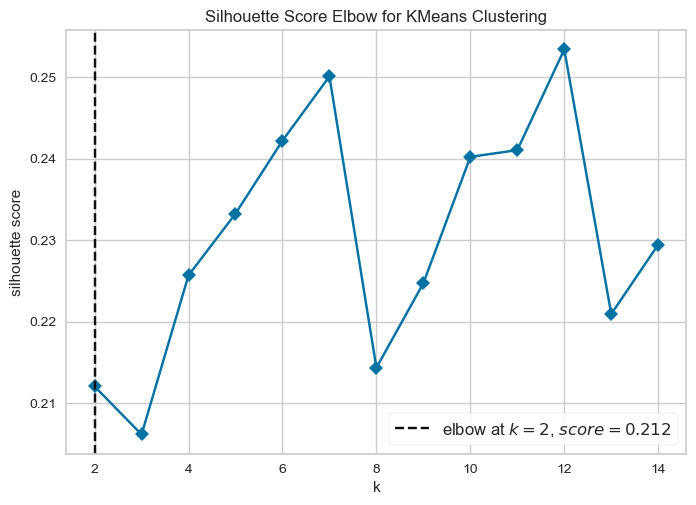

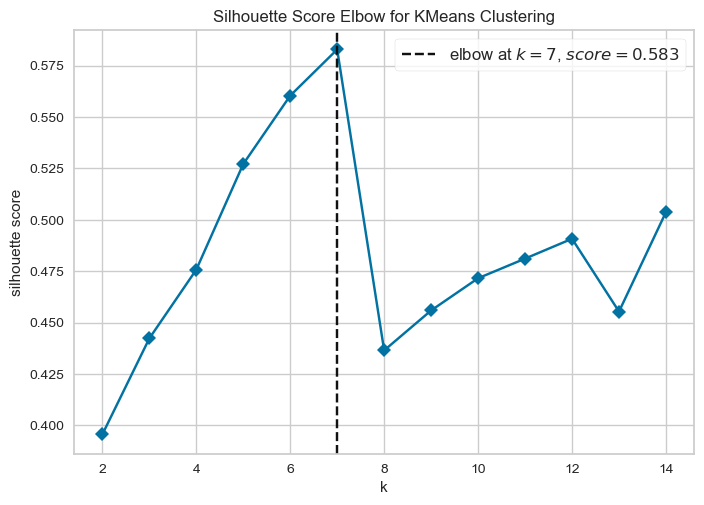

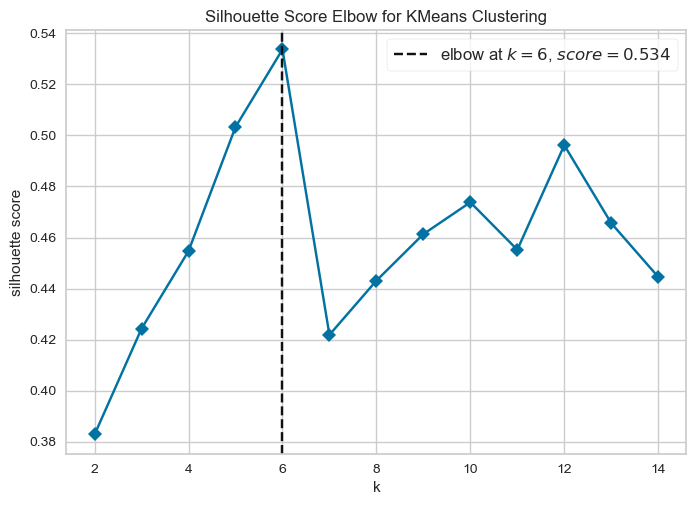

In [5]:
# look best cluster with visualization

cluster_standart = best_cluster(X_train_standart)
cluster_normal = best_cluster(X_train_normal)
cluster_minmax = best_cluster(X_train_minmax)
cluster_pca = best_cluster(X_train_pca)
cluster_yeo = best_cluster(X_train_yeo)
cluster_log = best_cluster(X_train_log)
cluster_nomr_yeo = best_cluster(train_nomr_yeo)
cluster_nomr_log = best_cluster(train_norm_log)
cluster_stand_log = best_cluster(train_stand_log)
cluster_stand_yeo = best_cluster(train_stand_yeo)
cluster_minmax_log = best_cluster(train_minmax_log)
cluster_minmax_yeo = best_cluster(train_minmax_yeo)

In [6]:
# best cluster 
clust_standart = 4
clust_normal = 9
clust_minmax = 7
clust_pca = 8
clust_yeo = 2
clust_log = 4
clust_nomr_yeo = 2
clust_nomr_log = 4
clust_stand_log = 2
clust_stand_yeo = 2
clust_minmax_log = 5
clust_minmax_yeo = 5

# Model K-means

In [7]:
# model Kmeans     
def kmeans(data, cluster):
    """
    Function for model kmeans clustering
    input data and sum of cluster
    """
    kmeans = KMeans(n_clusters=cluster) # input cluster
    kmeans.fit(data)
    
    ## Predictions
    y_pred = kmeans.predict(data)
    return  y_pred

In [8]:
# copy data for model kmeans
data_standart_kmeans = X_train_standart.copy()
data_normal_kmeans = X_train_normal.copy()
data_minmax_kmeans = X_train_minmax.copy()
data_pca_kmeans = X_train_pca.copy()
data_yeo_kmeans = X_train_yeo.copy()
data_log_kmeans = X_train_log.copy()
data_normyeo_kmeans = train_nomr_yeo.copy()
data_normlog_kmeans = train_norm_log.copy()
data_standlog_kmeans = train_stand_log.copy()
data_standyeo_kmeans = train_stand_yeo.copy()
data_minmaxlog_kmeans = train_minmax_log.copy()
data_minmaxyeo_kmeans = train_minmax_yeo.copy()

In [9]:
# Call function model kmeans
data_standart_kmeans['Cluster'] = kmeans(data = data_standart_kmeans,cluster = clust_standart )
data_normal_kmeans['Cluster'] = kmeans(data = data_normal_kmeans,cluster = clust_normal )
data_minmax_kmeans['Cluster'] = kmeans(data = data_minmax_kmeans,cluster = clust_minmax )
data_pca_kmeans['Cluster'] = kmeans(data = data_pca_kmeans,cluster = clust_pca )
data_yeo_kmeans['Cluster'] = kmeans(data = data_yeo_kmeans,cluster = clust_yeo )
data_log_kmeans['Cluster'] = kmeans(data = data_log_kmeans,cluster = clust_log )
data_normyeo_kmeans['Cluster'] = kmeans(data = data_normyeo_kmeans,cluster = clust_nomr_yeo )
data_normlog_kmeans['Cluster'] = kmeans(data = data_normlog_kmeans,cluster = clust_nomr_log )
data_standlog_kmeans['Cluster'] = kmeans(data = data_standlog_kmeans,cluster = clust_stand_log )
data_standyeo_kmeans['Cluster'] = kmeans(data = data_standyeo_kmeans,cluster = clust_stand_yeo )
data_minmaxlog_kmeans['Cluster'] = kmeans(data = data_minmaxlog_kmeans,cluster = clust_minmax_log )
data_minmaxyeo_kmeans['Cluster'] = kmeans(data = data_minmaxyeo_kmeans,cluster = clust_minmax_yeo )

In [10]:
# cek best score centroid
def score(X, y):
    score = (round(silhouette_score(X,y), 2))
    print(score)
    return 

In [11]:
# call function

score_1 = score(data_standart_kmeans,data_standart_kmeans['Cluster'])
score_2 = score(data_normal_kmeans,data_normal_kmeans['Cluster'])
score_3 = score(data_minmax_kmeans,data_minmax_kmeans['Cluster'])
score_4 = score(data_pca_kmeans,data_pca_kmeans['Cluster'])
score_5 = score(data_yeo_kmeans,data_yeo_kmeans['Cluster'])
score_6 = score(data_log_kmeans,data_log_kmeans['Cluster'])
score_7 = score(data_normyeo_kmeans,data_normyeo_kmeans['Cluster'])
score_8 = score(data_normlog_kmeans,data_normlog_kmeans['Cluster'])
score_9 = score(data_standlog_kmeans,data_standlog_kmeans['Cluster'])
score_10 = score(data_standyeo_kmeans,data_standyeo_kmeans['Cluster'])
score_11 = score(data_minmaxlog_kmeans,data_minmaxlog_kmeans['Cluster'])
score_12 = score(data_minmaxyeo_kmeans,data_minmaxyeo_kmeans['Cluster'])

0.36
1.0
0.79
0.69
0.22
0.35
0.36
0.96
0.23
0.22
0.63
0.62


We want check interpretation data from best score :
- data_normal_kmeans
- data_minmax_kmeans
- data_normlog_kmeans

# Interpretation

In [12]:
# distribution of classes (%) data_normal_kmeans
(data_normal_kmeans.Cluster.value_counts(1)*100).round(2)

0    90.00
6     5.61
5     3.16
4     0.77
7     0.20
8     0.10
1     0.05
2     0.05
3     0.05
Name: Cluster, dtype: float64

In [13]:
# distribution of classes (%) data_normlog_kmeans
(data_minmax_kmeans.Cluster.value_counts(1)*100).round(2)

3    48.83
1    13.98
0    11.22
4     9.08
5     8.21
6     5.26
2     3.42
Name: Cluster, dtype: float64

In [14]:
# distribution of classes (%) data_normlog_kmeans
(data_normlog_kmeans.Cluster.value_counts(1)*100).round(2)

0    40.56
2    40.26
1    12.50
3     6.68
Name: Cluster, dtype: float64

best sprate from cluster is data_minmax_kmeans because we can interprate thi data for user 

In [15]:
# add columns cluster to data before transform for look interpretation
data_interpret['Cluster'] = kmeans(data = data_minmax_kmeans,cluster = clust_normal )

In [16]:
data_minmax_kmeans

,Installment_BNI,Garage,Price,Bedroom,Building,Installment_BCA,Land,Installment_Mandiri,Bathroom,Important_places,No_important_places,Location_Kecamatan,Location_Kelurahan,Location_Kota,Floor_Lantai_2,Floor_Lantai_3,Floor_Lantai_1,Cluster
0,0.023520,0.0,0.023520,0.133333,0.044910,0.023520,0.001769,0.023520,0.096774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.029674,0.1,0.029674,0.433333,0.095060,0.029674,0.000744,0.029674,0.419355,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.018391,0.0,0.018391,0.133333,0.065494,0.018391,0.002794,0.018391,0.129032,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5
3,0.069677,0.0,0.069677,0.100000,0.112275,0.069677,0.003347,0.069677,0.064516,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.251228,0.2,0.251228,0.433333,0.103668,0.251228,0.000955,0.251228,0.451613,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.019417,0.0,0.019417,0.100000,0.056138,0.019417,0.001106,0.019417,0.096774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1956,0.004749,0.1,0.004749,0.100000,0.014970,0.004749,0.000603,0.004749,0.032258,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6
1957,0.016340,0.1,0.016340,0.100000,0.050524,0.016340,0.001910,0.016340,0.096774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4
1958,0.117885,0.1,0.117885,0.133333,0.073728,0.117885,0.000804,0.117885,0.096774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4


In [39]:
# drop columns cluster
data_minmax_kmeans = data_minmax_kmeans.drop(columns=['Cluster'])

KeyError: "['Cluster'] not found in axis"

In [40]:
data_interpret.head(5)

,Price,Bedroom,Bathroom,Land,Building,Garage,Important places,Location,Installment_BCA,Installment_BNI,Installment_Mandiri,Floor,Cluster
0,2300000000,4,3,186,120,0,Tempat Penting,Kecamatan,10733333,2821333,6900000,Lantai_1,1
1,2900000000,13,13,84,254,1,Tempat Penting,Kecamatan,13533333,3557333,8700000,Lantai_1,1
2,1800000000,4,4,288,175,0,Tidak Penting,Kecamatan,8400000,2208000,5400000,Lantai 2,2
3,6800000000,3,2,343,300,0,Tempat Penting,Kecamatan,31733333,8341333,20400000,Lantai_1,1
4,24500000000,13,14,105,277,2,Tempat Penting,Kecamatan,114333333,30053333,73500000,Lantai_1,1


In [30]:
# make condition cluster for check modus for categoric columns and median for numeric columns interpretation data
clust_0 = data_interpret[(data_interpret['Cluster'] == 0)]
clust_1 = data_interpret[(data_interpret['Cluster'] == 1)]
clust_2 = data_interpret[(data_interpret['Cluster'] == 2)]
clust_3 = data_interpret[(data_interpret['Cluster'] == 3)]
clust_4 = data_interpret[(data_interpret['Cluster'] == 4)]
clust_5 = data_interpret[(data_interpret['Cluster'] == 5)]
clust_6 = data_interpret[(data_interpret['Cluster'] == 6)]

In [88]:
# interpreation cluster 0

med_clus0 = clust_0.median().astype('int64')
mod_clus0 = clust_0[['Important places', 'Location', 'Floor']].mode()
desc_clust0 = clust_0.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\2816116898.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus0 = clust_0.median().astype('int64')


In [92]:
# interpreation cluster 1

med_clus1 = clust_1.median().astype('int64')
mod_clus1 = clust_1[['Important places', 'Location', 'Floor']].mode()
desc_clust1 = clust_1.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\1604833568.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus1 = clust_1.median().astype('int64')


In [96]:
# interpreation cluster 2

med_clus2 = clust_2.median().astype('int64')
mod_clus2 = clust_2[['Important places', 'Location', 'Floor']].mode()
desc_clust2 = clust_2.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\1196252177.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus2 = clust_2.median().astype('int64')


In [100]:
# interpreation cluster 3

med_clus3 = clust_3.median().astype('int64')
mod_clus3 = clust_3[['Important places', 'Location', 'Floor']].mode()
desc_clust3 = clust_3.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\2289250649.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus3 = clust_3.median().astype('int64')


In [104]:
# interpreation cluster 4

med_clus4 = clust_4.median().astype('int64')
mod_clus4 = clust_4[['Important places', 'Location', 'Floor']].mode()
desc_clust4 = clust_4.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\2076261856.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus4 = clust_4.median().astype('int64')


In [108]:
# interpreation cluster 5

med_clus5 = clust_5.median().astype('int64')
mod_clus5 = clust_5[['Important places', 'Location', 'Floor']].mode()
desc_clust5 = clust_5.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\3470820488.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus5 = clust_5.median().astype('int64')


In [112]:
# interpreation cluster 6

med_clus6 = clust_6.median().astype('int64')
mod_clus6 = clust_6[['Important places', 'Location', 'Floor']].mode()
min_clus6_price = min(clust_6['Price']) 
desc_clust6 = clust_6.describe().astype('int64')

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_9428\663388454.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_clus6 = clust_6.median().astype('int64')


### Save Data and Model 

In [20]:
# save model
kmeans = KMeans(n_clusters=7) # input cluster
kmeans.fit(data_minmax_kmeans)

KMeans(n_clusters=7)

In [22]:
# save transormation
minmax = MinMaxScaler()

In [23]:
# save model
pickle.dump(kmeans, open("C:/Users/HP Notebook/Desktop/deployment/Kmeans.pkl", 'wb'))

# save transform
pickle.dump(minmax, open("C:/Users/HP Notebook/Desktop/deployment/minmax.pkl", 'wb'))

In [29]:
# save data
pickle.dump(data_minmax_kmeans, open("C:/Users/HP Notebook/Desktop/deployment/data_fix.pkl", 'wb'))

we want check confusion matrix for know model is good or not

In [25]:
joblib.dump(data_minmax_kmeans, "D:/BOOTCAMP/project/(Block 4) ML Process/data feature/data_pytest.csv")

['D:/BOOTCAMP/project/(Block 4) ML Process/data feature/data_pytest.csv']

In [26]:
# check open data
data_deploy = pickle.load(open("data_fix.pkl", 'rb'))
data_deploy

,Installment_BNI,Garage,Price,Bedroom,Building,Installment_BCA,Land,Installment_Mandiri,Bathroom,Important_places,No_important_places,Location_Kecamatan,Location_Kelurahan,Location_Kota,Floor_Lantai_2,Floor_Lantai_3,Floor_Lantai_1
0,0.023520,0.0,0.023520,0.133333,0.044910,0.023520,0.001769,0.023520,0.096774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.029674,0.1,0.029674,0.433333,0.095060,0.029674,0.000744,0.029674,0.419355,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.018391,0.0,0.018391,0.133333,0.065494,0.018391,0.002794,0.018391,0.129032,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.069677,0.0,0.069677,0.100000,0.112275,0.069677,0.003347,0.069677,0.064516,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.251228,0.2,0.251228,0.433333,0.103668,0.251228,0.000955,0.251228,0.451613,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.019417,0.0,0.019417,0.100000,0.056138,0.019417,0.001106,0.019417,0.096774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1956,0.004749,0.1,0.004749,0.100000,0.014970,0.004749,0.000603,0.004749,0.032258,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1957,0.016340,0.1,0.016340,0.100000,0.050524,0.016340,0.001910,0.016340,0.096774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1958,0.117885,0.1,0.117885,0.133333,0.073728,0.117885,0.000804,0.117885,0.096774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Serving Model

In [ ]:
def Minmax(data, minmax = None):
    """
    This function used for convert data to
    Minmax scaler
    """
    if minmax == None:
        # Buat & Fit scaler
        minmax = MinMaxScaler()
        minmax.fit(data)

    # Tranform data
    data_minmax = minmax.transform(data)
    data_minmax = pd.DataFrame(data_minmax,
                               index = data.index,
                               columns = data.columns)
    
    return data_minmax, minmax

In [ ]:
features= data_minmax_kmeans.columns.to_list()
features

In [ ]:
# aplication model
input_data = pd.DataFrame()
for i in features:
    print(i)
    
    if i =='Price':
        print("Input berapa Price")
    if i =='Installment_BNI':
        print("Input berapa cicilan BNI")
    if i =='Garage':
        print("Input jumlah Garage")
    if i =='Bedroom':
        print("Input jumlah Bedroom")
    if i =='Building':
        print("Input jumlah Building")
    if i =='Installment_BCA':
        print("Input berapa cicilan BCA")
    if i =='Land':
        print("Input luas Land")
    if i =='Installment_Mandiri':
        print("Input berapa cicilan Mandiri")
    if i =='Bathroom':
        print("Input jumlah Bathroom")
    if i =='Important_places':
        print("Input Important_places 1/0")
    if i =='No_important_places':
        print("Input No_important_places 1/0")  
    if i =='Location_Kecamatan':
        print("Input Location_Kecamatan 1/0")    
    if i =='Location_Kelurahan':
        print("Input Location_Kelurahan 1/0")
    if i =='Location_Kota':
        print("Input Location_Kota 1/0")    
    if i =='Floor_Lantai_2':
        print("Input Floor_Lantai_2 1/0")
    if i =='Floor_Lantai_3':
        print("Input Floor_Lantai_3 1/0")
    if i =='Floor_Lantai_1':
        print("Input Floor_Lantai_3 1/0")
    number = float(input("Enter your value: "))

    if number < 0 :
        print("Please input non-negative value ")
        break
    else:
        pass
    x=' '
    print(x)
    column_name = i
    input_data.loc[0, column_name] = number

In [ ]:
# output from input data
input_data

In [ ]:
# reindex data
input_data = input_data.transpose().reindex(features).transpose()

In [ ]:
cols =['Installment_BNI',
 'Garage',
 'Price',
 'Bedroom',
 'Building',
 'Installment_BCA',
 'Land',
 'Installment_Mandiri',
 'Bathroom',
 'Important_places',
 'No_important_places',
 'Location_Kecamatan',
 'Location_Kelurahan',
 'Location_Kota',
 'Floor_Lantai_2',
 'Floor_Lantai_3',
 'Floor_Lantai_1'] 

In [ ]:
# transform
minmax = MinMaxScaler()
minmax.fit(input_data)

In [ ]:
# transform data input
inputdata = pd.DataFrame(minmax.transform(input_data[cols]),columns = cols)

In [ ]:
# prediction result
result_prediction= kmeans.predict(inputdata)
#data_hasil =pd.DataFrame(result_prediction,columns= ['Cluster'])
print(f'Hasil rekomendasi dari data yang diminta adalah cluster {result_prediction}')